In [ ]:
# In this code, multilingual datset on Pretrained model is used. I have added 6-7 more models below to compare accuracy on already pretrained model.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk(r'C:\Users\DELL\Desktop\Language_translator'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\DELL\Desktop\Language_translator\app.ipynb
C:\Users\DELL\Desktop\Language_translator\app.py
C:\Users\DELL\Desktop\Language_translator\model.py
C:\Users\DELL\Desktop\Language_translator\sentiment_analysis_term_train.csv
C:\Users\DELL\Desktop\Language_translator\Stress.csv
C:\Users\DELL\Desktop\Language_translator\translator.ipynb


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [10]:
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
model_name = "Helsinki-NLP/opus-mt-mul-en"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

In [12]:
# Translate text from any supported language to English
def translate(text, source_lang="auto"):
    try:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, source_lang=source_lang)
        outputs = model.generate(**inputs)
        translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        return translated_text
    except Exception as e:
        print(f"Translation error: {e}")
        return None

In [3]:
data=pd.read_csv(r'C:\Users\DELL\Desktop\Language_translator\sentiment_analysis_term_train.csv')

In [13]:
# Translate the 'text' column from Hindi to English
data['translated_text'] = data['text'].apply(lambda x: translate(x, source_lang="hi"))

# Remove rows with translation errors
data = data.dropna(subset=['translated_text'])

Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not recognized.
Keyword arguments {'source_lang': 'hi'} not reco

In [14]:
data.head()

,text,label,translated_text
0,हमें इससे बेहतर ब्राइटनेस वाले टेबलेट देखने को...,neg,We've got a better view of the Britneys tablet.
1,बैटरी लाइफ बहुत बढिया है।,pos,The battery is now fully recharged.
2,हकीकत ये है कि मेटल के नाम पर फोन में सिर्फ चा...,neu,"The fact is, in the name of metal, only four a..."
3,स्लोफो एक मनोरंजक एप्लिकेशन है इसमें कोई दो रा...,pos,Slofo is a entertainment application that has ...
4,अच्छी बैटरी क्षमता है।,pos,Good battery capacity.


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             2497 non-null   object
 1   label            2497 non-null   object
 2   translated_text  2497 non-null   object
dtypes: object(3)
memory usage: 58.7+ KB


In [16]:
data.isnull().sum()

text               0
label              0
translated_text    0
dtype: int64

In [17]:
data["label"].value_counts()

label
pos    1147
neu     999
neg     351
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

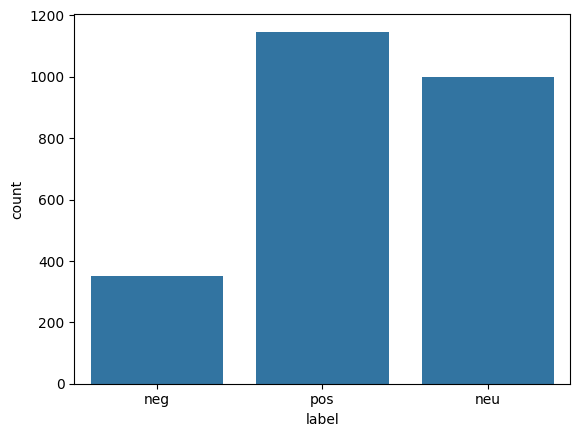

In [18]:
sns.countplot(x=data["label"])

In [19]:
data.shape

(2497, 3)

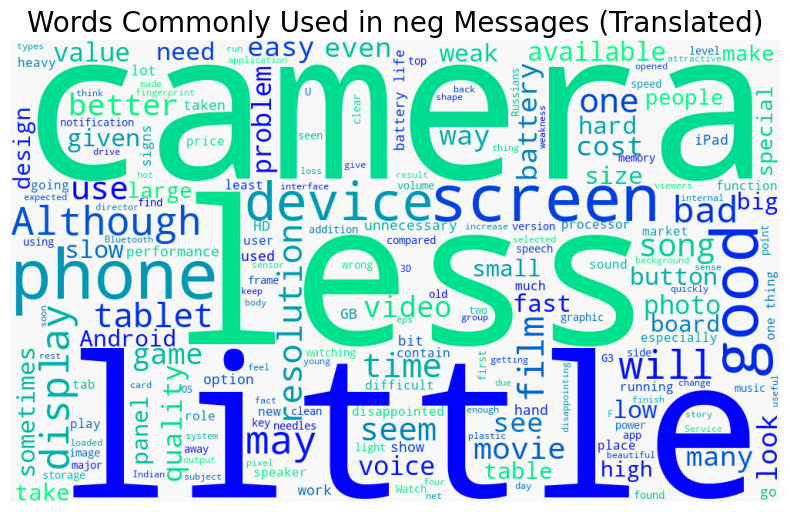

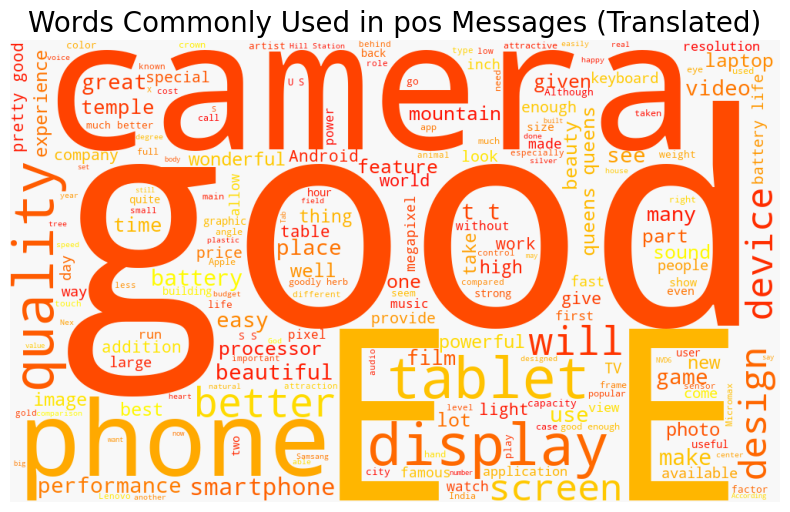

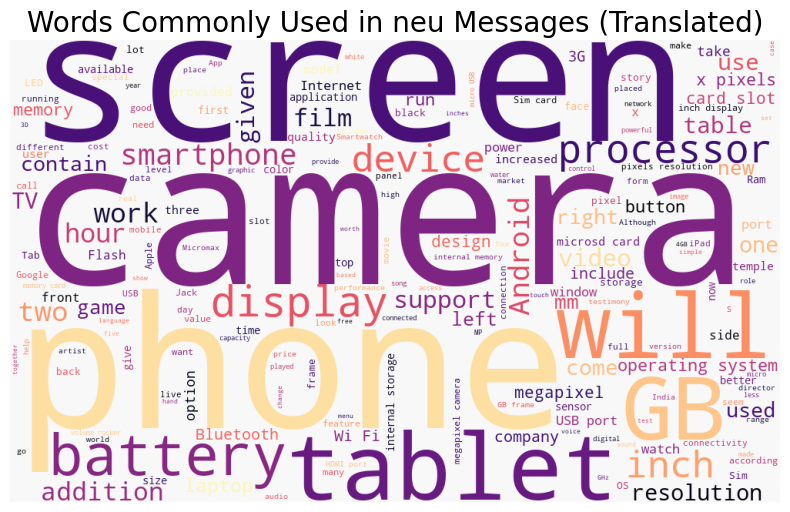

In [20]:
#WordCloud for the Sentiments
from wordcloud import WordCloud
for label, cmap in zip(['neg', 'pos', 'neu'],
                       ['winter', 'autumn', 'magma', 'viridis', 'plasma']):
    text = ' '.join(data.query('label == @label')['translated_text'])
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in {label} Messages (Translated)", size=20)
    plt.show()

In [27]:
# Map numerical labels to categorical labels
label_mapping = {'neg': 'No Stress', 'pos': 'Stress', 'neu': 'Neutral'}
data["new_label"] = data["label"].map(label_mapping)

# Extract relevant columns for further analysis
dataset = data[["translated_text", "label"]]
datas = data[["translated_text", "new_label"]]


In [28]:
dataset

,translated_text,label
0,We've got a better view of the Britneys tablet.,neg
1,The battery is now fully recharged.,pos
2,"The fact is, in the name of metal, only four a...",neu
3,Slofo is a entertainment application that has ...,pos
4,Good battery capacity.,pos
...,...,...
2492,"Yes, it doesn't contain the Dulu Sim function,...",neg
2493,The 33220 MACH battery is about 24 hours of fu...,neu
2494,The heroine also of the film judge Sharma with...,neu
2495,"However, we've found that it's sometimes gone ...",neg


In [29]:
datas

,translated_text,new_label
0,We've got a better view of the Britneys tablet.,No Stress
1,The battery is now fully recharged.,Stress
2,"The fact is, in the name of metal, only four a...",Neutral
3,Slofo is a entertainment application that has ...,Stress
4,Good battery capacity.,Stress
...,...,...
2492,"Yes, it doesn't contain the Dulu Sim function,...",No Stress
2493,The 33220 MACH battery is about 24 hours of fu...,Neutral
2494,The heroine also of the film judge Sharma with...,Neutral
2495,"However, we've found that it's sometimes gone ...",No Stress


In [30]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(datas["translated_text"],datas["new_label"],test_size=0.2)

In [31]:
print(Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape)

(1997,) (1997,) (500,) (500,)


In [32]:
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [33]:
model=clf.fit(Xtrain,Ytrain)

In [34]:
print("Accuracy is:",model.score(Xtrain,Ytrain))

Accuracy is: 0.8037055583375062


In [35]:
print("Accuracy is :",model.score(Xtest,Ytest))

Accuracy is : 0.672


In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(dataset["translated_text"],dataset["label"],test_size=0.2)
from sklearn.naive_bayes import BernoulliNB
# model = BernoulliNB()

clf1 = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', BernoulliNB()),
    ])
model1=clf1.fit(xtrain, ytrain)

In [38]:
print("Accuracy is:",model1.score(xtrain,ytrain))

Accuracy is: 0.7966950425638458


In [39]:
print("Accuracy is :",model1.score(xtest,ytest))

Accuracy is : 0.618


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [41]:
# Assuming 'dataset' is your DataFrame with columns 'translated_text' and 'label'
xtrain, xtest, ytrain, ytest = train_test_split(dataset["translated_text"], dataset["label"], test_size=0.2)

# Multinomial Naive Bayes
clf_nb = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

In [42]:
model_nb = clf_nb.fit(xtrain, ytrain)
ypred_nb = model_nb.predict(xtest)
accuracy_nb = accuracy_score(ytest, ypred_nb)
print("Multinomial Naive Bayes Accuracy:", accuracy_nb)
print(classification_report(ytest, ypred_nb))

Multinomial Naive Bayes Accuracy: 0.628
              precision    recall  f1-score   support

         neg       1.00      0.04      0.07        77
         neu       0.67      0.64      0.65       192
         pos       0.60      0.82      0.69       231

    accuracy                           0.63       500
   macro avg       0.76      0.50      0.47       500
weighted avg       0.69      0.63      0.58       500



In [43]:
# Random Forest
clf_rf = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier(n_estimators=100)),
])
model_rf = clf_rf.fit(xtrain, ytrain)
ypred_rf = model_rf.predict(xtest)
accuracy_rf = accuracy_score(ytest, ypred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(ytest, ypred_rf))

Random Forest Accuracy: 0.642
              precision    recall  f1-score   support

         neg       0.56      0.18      0.27        77
         neu       0.58      0.80      0.67       192
         pos       0.73      0.66      0.70       231

    accuracy                           0.64       500
   macro avg       0.62      0.55      0.55       500
weighted avg       0.65      0.64      0.62       500



In [44]:
# Support Vector Machine (SVM)
clf_svm = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC(kernel='linear')),
])
model_svm = clf_svm.fit(xtrain, ytrain)
ypred_svm = model_svm.predict(xtest)
accuracy_svm = accuracy_score(ytest, ypred_svm)
print("Support Vector Machine Accuracy:", accuracy_svm)
print(classification_report(ytest, ypred_svm))

Support Vector Machine Accuracy: 0.644
              precision    recall  f1-score   support

         neg       0.56      0.25      0.34        77
         neu       0.64      0.72      0.68       192
         pos       0.66      0.71      0.69       231

    accuracy                           0.64       500
   macro avg       0.62      0.56      0.57       500
weighted avg       0.64      0.64      0.63       500



In [45]:
from sklearn.linear_model import LogisticRegression
clf_lr = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression()),
])
model_lr = clf_lr.fit(xtrain, ytrain)
ypred_lr = model_lr.predict(xtest)
accuracy_lr = accuracy_score(ytest, ypred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print(classification_report(ytest, ypred_lr))


Logistic Regression Accuracy: 0.646
              precision    recall  f1-score   support

         neg       0.67      0.18      0.29        77
         neu       0.64      0.72      0.68       192
         pos       0.65      0.74      0.69       231

    accuracy                           0.65       500
   macro avg       0.65      0.55      0.55       500
weighted avg       0.65      0.65      0.62       500



In [46]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', DecisionTreeClassifier()),
])
model_dt = clf_dt.fit(xtrain, ytrain)
ypred_dt = model_dt.predict(xtest)
accuracy_dt = accuracy_score(ytest, ypred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print(classification_report(ytest, ypred_dt))


Decision Tree Accuracy: 0.57
              precision    recall  f1-score   support

         neg       0.31      0.21      0.25        77
         neu       0.55      0.64      0.59       192
         pos       0.65      0.64      0.64       231

    accuracy                           0.57       500
   macro avg       0.50      0.49      0.49       500
weighted avg       0.56      0.57      0.56       500



In [47]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gb = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', GradientBoostingClassifier()),
])
model_gb = clf_gb.fit(xtrain, ytrain)
ypred_gb = model_gb.predict(xtest)
accuracy_gb = accuracy_score(ytest, ypred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)
print(classification_report(ytest, ypred_gb))


Gradient Boosting Accuracy: 0.62
              precision    recall  f1-score   support

         neg       0.53      0.22      0.31        77
         neu       0.54      0.82      0.65       192
         pos       0.78      0.59      0.67       231

    accuracy                           0.62       500
   macro avg       0.61      0.54      0.54       500
weighted avg       0.65      0.62      0.61       500



In [48]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', KNeighborsClassifier()),
])
model_knn = clf_knn.fit(xtrain, ytrain)
ypred_knn = model_knn.predict(xtest)
accuracy_knn = accuracy_score(ytest, ypred_knn)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)
print(classification_report(ytest, ypred_knn))


K-Nearest Neighbors Accuracy: 0.54
              precision    recall  f1-score   support

         neg       0.45      0.19      0.27        77
         neu       0.49      0.84      0.62       192
         pos       0.70      0.40      0.51       231

    accuracy                           0.54       500
   macro avg       0.55      0.48      0.47       500
weighted avg       0.58      0.54      0.51       500



In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'dataset' is your DataFrame with columns 'translated_text' and 'label'
x_train, x_test, y_train, y_test = train_test_split(dataset["translated_text"], dataset["label"], test_size=0.2)

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Tokenize and pad sequences
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)
x_train_padded = pad_sequences(x_train_sequences, maxlen=max_len)
x_test_padded = pad_sequences(x_test_sequences, maxlen=max_len)

# Build the LSTM model
embedding_dim = 50
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=3, activation='softmax'))  # Assuming 3 classes (neg, pos, neu)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_padded, y_train_encoded, epochs=12, validation_data=(x_test_padded, y_test_encoded))

# Evaluate the model
y_prob = model.predict(x_test_padded)
y_pred = y_prob.argmax(axis=-1)
accuracy_lstm = accuracy_score(y_test_encoded, y_pred)
print("LSTM Accuracy:", accuracy_lstm)
print(classification_report(y_test_encoded, y_pred))



Epoch 1/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.4425 - loss: 6.9328 - val_accuracy: 0.4980 - val_loss: 0.9826
Epoch 2/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5062 - loss: 0.9817 - val_accuracy: 0.6040 - val_loss: 0.9730
Epoch 3/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7084 - loss: 1663.5663 - val_accuracy: 0.5600 - val_loss: 0.9532
Epoch 4/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7086 - loss: 0.9723 - val_accuracy: 0.6040 - val_loss: 0.9149
Epoch 5/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7180 - loss: 2.2652 - val_accuracy: 0.6240 - val_loss: 0.9038
Epoch 6/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7752 - loss: 0.8215 - val_accuracy: 0.6280 - val_loss: 0.8666
Epoch 7/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7815 - loss: 0.8989 - val_accuracy: 0.6260 - val_loss: 0.8581
Epoch 8/12
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7672 - loss: 0.7471 - val_accuracy: 0.6300 

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
